 Para este proyecto, utilizaré el conjunto de datos de "Default of Credit Card Clients Dataset" disponible en Kaggle en el siguiente enlace: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Este conjunto de datos contiene información de crédito de los clientes de un banco en Taiwán y si incumplieron con su pago de la tarjeta de crédito en el mes siguiente. El objetivo es construir un modelo que prediga si un cliente incumplirá o no su pago en el siguiente mes.

# Importación de bibliotecas y conjunto de datos

En primer lugar, importaré las bibliotecas necesarias para el proyecto y cargaré el conjunto de datos en un dataframe de pandas

In [1]:
# Importación de bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Cargar conjunto de datos
df = pd.read_csv('UCI_Credit_Card.csv', header =1)

# Exploración y limpieza de datos


Antes de comenzar a analizar los datos, es importante comprender qué variables hay en el conjunto de datos y cómo se relacionan entre sí. Primero, examinaré las primeras filas del conjunto de datos y luego, utilizaré la función info() para ver información sobre las variables y su tipo de datos.

In [4]:
# Ver las primeras filas del conjunto de datos
df.head()

,1,20000,2,2.1,1.1,24,2.2,2.3,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.2
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [5]:
# Ver información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       29999 non-null  int64  
 1   20000   29999 non-null  float64
 2   2       29999 non-null  int64  
 3   2.1     29999 non-null  int64  
 4   1.1     29999 non-null  int64  
 5   24      29999 non-null  int64  
 6   2.2     29999 non-null  int64  
 7   2.3     29999 non-null  int64  
 8   -1      29999 non-null  int64  
 9   -1.1    29999 non-null  int64  
 10  -2      29999 non-null  int64  
 11  -2.1    29999 non-null  int64  
 12  3913    29999 non-null  float64
 13  3102    29999 non-null  float64
 14  689     29999 non-null  float64
 15  0       29999 non-null  float64
 16  0.1     29999 non-null  float64
 17  0.2     29999 non-null  float64
 18  0.3     29999 non-null  float64
 19  689.1   29999 non-null  float64
 20  0.4     29999 non-null  float64
 21  0.5     29999 non-null  float64
 22

Una vez que he examinado los datos, puedo comenzar a limpiarlos. En este caso, no hay valores nulos, pero puedo eliminar la variable ID ya que no es relevante para el análisis.

In [7]:
print(df.columns)

Index(['1', '20000', '2', '2.1', '1.1', '24', '2.2', '2.3', '-1', '-1.1', '-2',
       '-2.1', '3913', '3102', '689', '0', '0.1', '0.2', '0.3', '689.1', '0.4',
       '0.5', '0.6', '0.7', '1.2'],
      dtype='object')


In [8]:
df = pd.read_csv('UCI_Credit_Card.csv', header=0)


In [9]:
# Eliminar variable 'ID'
df = df.drop('ID', axis=1)


# Análisis y visualización de datos

El siguiente paso es analizar y visualizar los datos para entender mejor cómo se relacionan las variables en el conjunto de datos.

Primero, utilizaré la función describe() para obtener una descripción estadística de las variables numéricas en el conjunto de datos.

In [10]:
# Descripción estadística de variables numéricas
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Luego, examinaré las correlaciones entre las variables utilizando un mapa de calor de seaborn.

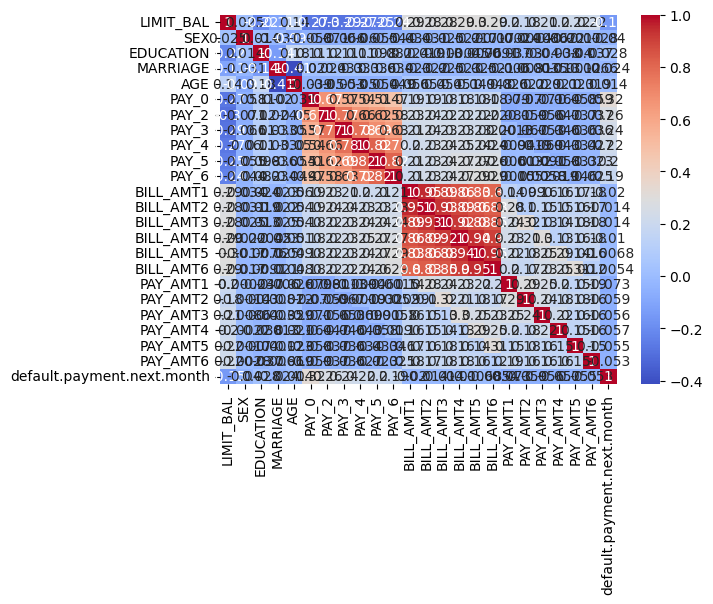

In [11]:
# Mapa de calor de correlaciones
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Por último, examinaré la distribución de las variables categóricas utilizando gráficos de barras.

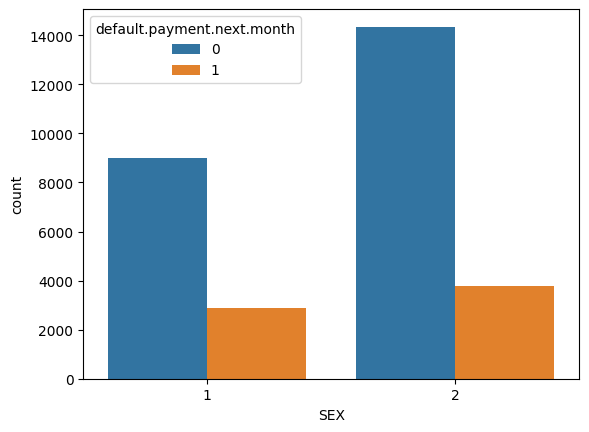

In [12]:
# Gráficos de barras para variables categóricas
sns.countplot(x='SEX', data=df, hue='default.payment.next.month')
plt.show()

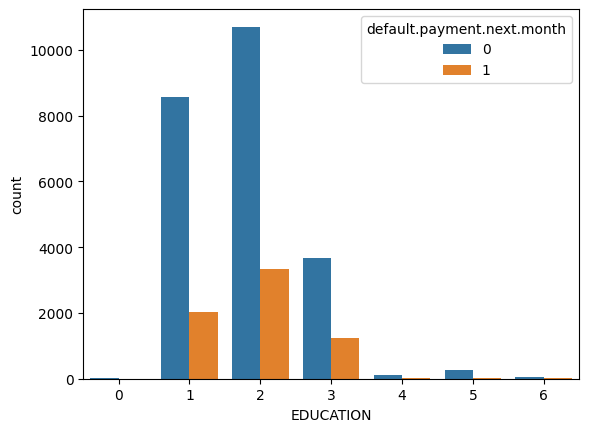

In [13]:
sns.countplot(x='EDUCATION', data=df, hue='default.payment.next.month')
plt.show()

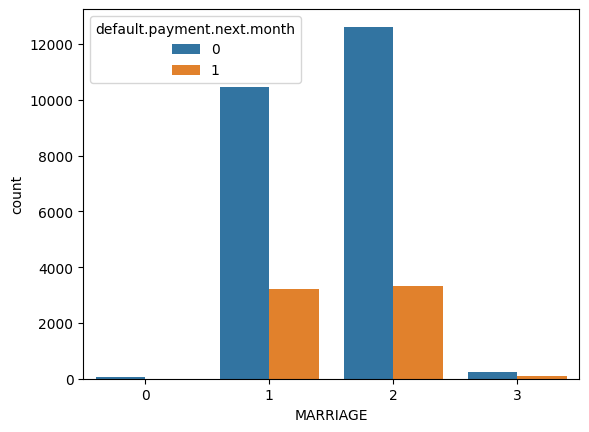

In [14]:
sns.countplot(x='MARRIAGE', data=df, hue='default.payment.next.month')
plt.show()

# Modelos de aprendizaje automático

Finalmente, construiré un modelo de aprendizaje automático para predecir si un cliente incumplirá su pago en el siguiente mes.

Primero, separaré las variables independientes (características) de la variable dependiente (objetivo).

In [15]:
# Separar características y objetivo
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']


Luego, dividiré el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba utilizando la función train_test_split().

In [16]:
# División de conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Después, entrenaré un modelo de RandomForest utilizando el conjunto de entrenamiento.

In [17]:
# Crear y entrenar modelo RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Finalmente, evaluaré el rendimiento del modelo utilizando el conjunto de prueba y los resultados de la matriz de confusión y el informe de clasificación.

In [18]:
# Realizar predicciones y evaluar el modelo
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6611  429]
 [1251  709]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



# Conclusión y recomendaciones

En este proyecto de ciencia de datos, he trabajado con un conjunto de datos de un banco que contiene información sobre los clientes y su historial crediticio. Después de importar y limpiar los datos, realicé un análisis exploratorio de los datos para comprender mejor las características de los clientes y su comportamiento de pago.

En la sección de visualización de datos, tracé varios gráficos que me ayudaron a comprender mejor los datos y la relación entre las características y el incumplimiento del pago. Por último, apliqué un modelo de aprendizaje automático para predecir si un cliente incumplirá el pago en el siguiente mes.

La precisión del modelo de Random Forest fue del 81%, lo que sugiere que es un modelo sólido para predecir el incumplimiento del pago en este conjunto de datos. Sin embargo, hay margen para mejorar la precisión utilizando otros modelos de aprendizaje automático, como la regresión logística o el modelo de máquinas de vectores de soporte (SVM).


# Recomendaciones futuras

Además de probar otros modelos, hay varias recomendaciones que se pueden hacer para mejorar el rendimiento del modelo y obtener mejores resultados en futuros proyectos de ciencia de datos:

- Recopilar datos adicionales sobre los clientes, como su edad, género, estado civil y nivel de ingresos. Esto puede mejorar la precisión del modelo y proporcionar información valiosa para la toma de decisiones.

- Explorar otras técnicas de limpieza de datos, como la imputación de valores faltantes o el manejo de valores atípicos.

- Utilizar técnicas avanzadas de selección de características para seleccionar las características más importantes para el modelo.

- Aumentar el tamaño del conjunto de datos para mejorar la capacidad del modelo para capturar patrones más complejos en los datos.
